In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
%matplotlib inline

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [23]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

In [24]:
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [25]:
!pip install -q kaggle
!mkdir -p ~/.kaggle

In [26]:
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [27]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [28]:
!ls

 creditcardfraud.zip   files  'kaggle (1).json'   kaggle.json   sample_data


In [29]:
import zipfile
zip_ref = zipfile.ZipFile('creditcardfraud.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()
import pandas as pd
credit_card=pd.read_csv('/content/files/creditcard.csv')

In [30]:
credit_card.head() # printing first 5 rows of credit_card dataframe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [31]:
credit_card[credit_card['Class']==1].shape

(492, 31)

We have 492 samples which are fraud Transactions

In [32]:
credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


We can see the Descriptive View of The Dataset.

In [33]:
credit_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

checking the null values seems that there are no null values 

In [34]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [35]:
credit_card.columns # returns Column Names

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [36]:
credit_card.Class.unique() # 1 for fraud and 0 for not a fraud

array([0, 1])

In [37]:
# Check the Fraud and Non Fraud sample size

credit_card.Class.value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [38]:
#conver the sample size into percentage

print('Total Precentage of Fraud Transactions is: {}'.format(credit_card.Class.value_counts()[0]/len(credit_card)*100))
print('Total Precentage of Non-Fraud Transactions is: {}'.format(credit_card.Class.value_counts()[1]/len(credit_card)*100))

Total Precentage of Fraud Transactions is: 99.82725143693798
Total Precentage of Non-Fraud Transactions is: 0.1727485630620034


Text(0.5, 1.0, 'Class Distribution where \n0:Fraud and 1: Not a Fraud')

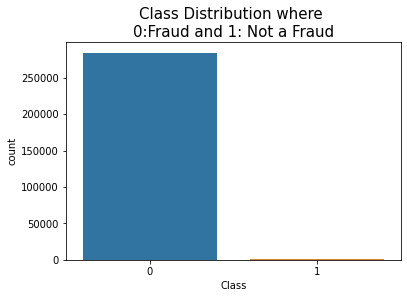

In [39]:
sns.countplot(x='Class',data=credit_card)
plt.title('Class Distribution where \n0:Fraud and 1: Not a Fraud',fontsize=15)

Dataset is imbalanced As the number of Non Fraud Transactions is higher than Fraud Transactions , in such case when the dataset is applied to Machine Learning the Algorithm becomes highly biased

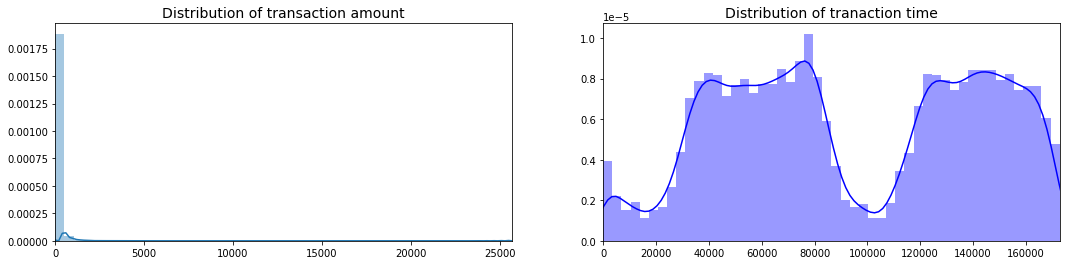

In [40]:
fig,ax=plt.subplots(1,2,figsize=(18,4))

amount_val=credit_card.Amount.values
time_val=credit_card.Time.values

sns.distplot(amount_val,ax=ax[0])
ax[0].set_title('Distribution of transaction amount',fontsize=14)
ax[0].set_xlim(min(amount_val),max(amount_val))

sns.distplot(time_val,ax=ax[1],color='b')
ax[1].set_title('Distribution of tranaction time',fontsize=14)
ax[1].set_xlim(min(time_val),max(time_val))

plt.show()

## By the graph we can see that the features are skewed

The DataFrame Contains all the columns scaled except Transaction Time and Transaction amount we need to scale even these columns

In [41]:
from sklearn.preprocessing import StandardScaler

columns=['Amount','Time']
scaler=StandardScaler()

for col in columns:
    credit_card[col+'_scaled']=scaler.fit_transform(credit_card[col])

ValueError: ignored

In [42]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [43]:
credit_card.drop(['Time','Amount'],inplace=True,axis=1)

In [44]:
credit_card.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit


X=credit_card.drop('Class',axis=1)
y=credit_card['Class']

sss=StratifiedShuffleSplit(n_splits=5,random_state=None)

for train_index,test_index in sss.split(X,y):
    print('Train:',train_index,'Test:',test_index)
    original_Xtrain,original_Xtest=X.loc[train_index],X.loc[test_index]
    original_ytrain,original_ytest=y.loc[train_index],y.loc[test_index]
    
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [219579  12413 202347 ... 278667  89344 151204] Test: [125607   8750 244842 ... 122412   5343 206935]
Train: [272999 193201 247611 ...   6919  75920 137565] Test: [155434 168131 283649 ...  24297  65335 115241]
Train: [181318 190060  65113 ... 283980  12718 155750] Test: [252852  62339  11080 ... 194794  83422 167135]
Train: [141467  74623  53827 ... 236349 144715  90593] Test: [129972 196542  98144 ... 170835  50689 213772]
Train: [ 13985 236615 176390 ... 119191  42969  47069] Test: [ 84886  56431  65717 ... 277093 173700 198397]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827173 0.00172827]
[0.99827955 0.00172045]


In [46]:
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print(test_unique_label)
print(test_counts_label)
print(train_unique_label, train_counts_label)

[0 1]
[28432    49]
[0 1] [255883    443]


In [47]:
credit_card=credit_card.sample(frac=1)
fraud_df=credit_card.loc[credit_card['Class']==1]
non_fraud_df=credit_card.loc[credit_card['Class']==0][:492]

normal_distributed_df=pd.concat([fraud_df,non_fraud_df])

new_df=normal_distributed_df.sample(frac=1,random_state=42)
print(new_df.head())
print(new_df.shape)

              V1        V2        V3  ...       V27       V28  Class
204008 -0.226996  0.306584  0.471356  ...  0.068854  0.120761      0
29687  -2.019001  1.491270  0.005222  ...  0.626283  0.152440      1
274650  1.955058  0.214607 -1.954177  ... -0.037786 -0.068296      0
261473 -2.349340  1.512604 -2.647497  ... -0.736073  0.733703      1
233258 -1.611877 -0.408410 -3.829762  ... -0.136243 -0.009852      1

[5 rows x 29 columns]
(984, 29)


In [48]:
new_df.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Equallay distributed classes')

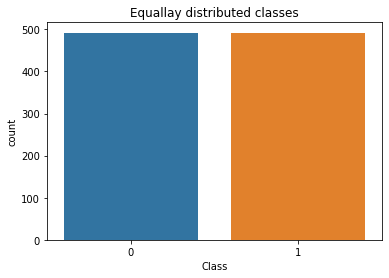

In [49]:
sns.countplot('Class',data=new_df)
plt.title('Equallay distributed classes')

In [50]:
credit_card.corr(min_periods=0)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
V1,1.000000e+00,-1.403764e-16,-5.831480e-16,-1.842700e-16,4.247449e-16,1.053418e-16,8.002428e-17,1.075046e-16,9.155757e-18,9.852744e-17,2.636570e-16,1.966439e-16,-2.755421e-17,3.955041e-16,-9.133983e-17,3.360300e-16,-3.658208e-17,1.349254e-16,1.607558e-16,2.823463e-16,-7.851139e-17,6.683358e-17,1.820590e-16,-2.919909e-17,-2.016400e-16,-1.311566e-16,1.242829e-16,2.204709e-16,-0.101347
V2,-1.403764e-16,1.000000e+00,-2.867342e-18,-1.330429e-16,-1.269909e-16,2.760152e-16,-1.149582e-16,-6.392051e-17,2.650021e-17,-1.394116e-16,3.243266e-16,-2.848935e-16,-5.869893e-17,-4.091735e-16,1.021365e-16,4.719870e-17,-5.852228e-16,2.207743e-16,1.407783e-17,4.509201e-17,9.896523e-17,1.982007e-16,1.422624e-16,-1.172223e-16,9.315160e-17,2.795391e-16,-4.202227e-16,-4.004878e-16,0.091289
V3,-5.831480e-16,-2.867342e-18,1.000000e+00,-2.105165e-16,-4.972512e-16,1.479630e-15,4.351098e-16,-1.167963e-16,9.743113e-17,2.367862e-16,1.435230e-16,1.886750e-16,-3.799576e-17,7.001177e-16,-7.477240e-17,6.253623e-16,1.599188e-16,3.101599e-16,3.550616e-16,9.711628e-17,-1.369934e-16,-2.427177e-16,-5.833970e-17,1.774568e-17,1.570075e-16,-2.174994e-16,5.751471e-16,7.250300e-16,-0.192961
V4,-1.842700e-16,-1.330429e-16,-2.105165e-16,1.000000e+00,-1.893541e-15,-4.777308e-16,-1.147186e-16,5.984768e-16,6.050286e-16,-1.139634e-16,-3.107312e-16,-2.282730e-16,1.297300e-17,-1.139547e-16,1.333619e-16,-1.333083e-16,-4.022445e-16,-4.038962e-17,-2.932542e-16,-2.097074e-16,-5.959701e-17,2.304654e-16,1.601821e-16,1.581056e-16,6.467948e-16,-4.301823e-16,-1.085105e-16,-6.260611e-17,0.133447
V5,4.247449e-16,-1.269909e-16,-4.972512e-16,-1.893541e-15,1.000000e+00,7.093444e-16,-1.398699e-16,4.953623e-16,4.879068e-16,1.262625e-16,7.285414e-16,3.314392e-16,-2.977560e-16,1.618379e-16,1.813301e-16,6.399907e-16,4.903337e-16,3.719578e-16,-9.856777e-17,-6.120970e-17,-1.913203e-16,4.773694e-17,-1.045154e-16,-9.905614e-16,-6.107390e-17,3.421899e-16,7.479924e-16,-1.167395e-16,-0.094974
V6,1.053418e-16,2.760152e-16,1.479630e-15,-4.777308e-16,7.093444e-16,1.000000e+00,4.738610e-17,-3.588934e-16,-1.686765e-16,1.352701e-16,8.573623e-16,2.615346e-16,-1.606207e-16,3.355413e-16,-5.416561e-17,-6.525647e-17,9.779200e-17,5.875773e-17,9.424989e-17,-2.089656e-17,-1.658585e-16,-1.469715e-16,-5.913206e-19,-1.070387e-15,5.411748e-16,-2.427295e-16,-2.737351e-16,5.586369e-16,-0.043643
V7,8.002428e-17,-1.149582e-16,4.351098e-16,-1.147186e-16,-1.398699e-16,4.738610e-17,1.000000e+00,-7.446156e-17,-9.481626e-18,3.425617e-16,-3.662953e-16,5.745100e-16,-4.087352e-17,4.300404e-17,-7.717499e-17,4.953985e-16,5.394152e-16,2.099802e-16,-5.419383e-17,2.671092e-16,3.077575e-17,-6.163546e-16,-3.773001e-16,-6.684209e-17,1.110945e-16,-8.579745e-16,-3.470094e-16,-1.956991e-18,-0.187257
V8,1.075046e-16,-6.392051e-17,-1.167963e-16,5.984768e-16,4.953623e-16,-3.588934e-16,-7.446156e-17,1.000000e+00,4.498176e-16,-5.972626e-17,2.781916e-17,-2.436086e-16,-3.059271e-16,-2.285584e-16,1.136924e-16,1.745004e-16,-3.827530e-16,-2.920605e-16,-3.495247e-16,4.204059e-17,-1.143544e-16,4.296296e-17,2.228045e-16,-2.444905e-16,-1.507978e-16,-3.306971e-18,3.044463e-16,-5.024613e-16,0.019875
V9,9.155757e-18,2.650021e-17,9.743113e-17,6.050286e-16,4.879068e-16,-1.686765e-16,-9.481626e-18,4.498176e-16,1.000000e+00,-4.231547e-16,3.040426e-16,-1.207458e-15,9.422094e-16,8.717059e-16,-8.881834e-16,-5.088975e-16,7.302807e-16,6.733655e-17,1.260958e-16,-3.718294e-16,1.550613e-16,-1.844501e-16,-8.637519e-17,-2.867423e-16,2.524695e-16,-1.151013e-16,-1.803879e-16,7.983387e-16,-0.097733
V10,9.852744e-17,-1.394116e-16,2.367862e-16,-1.139634e-16,1.262625e-16,1.352701e-16,3.425617e-16,-5.972626e-17,-4.231547e-16,1.000000e+00,-3.544739e-16,8.274546e-16,-4.405419e-16,7.377713e-16,4.341490e-16,1.632349e-16,7.221206e-16,5.294227e-16,2.896029e-18,-1.346397e-15,1.071395e-15,-2.717118e-16,2.654488e-16,-7.343465e-17,-5.132965e-16,-3.645586e-16,-2.786457e-16,2.615795e-1

In [51]:
credit_card_corr=credit_card.corr()
new_df_corr=new_df.corr()

Text(0.5, 1.0, 'Subsample correlation matrix')

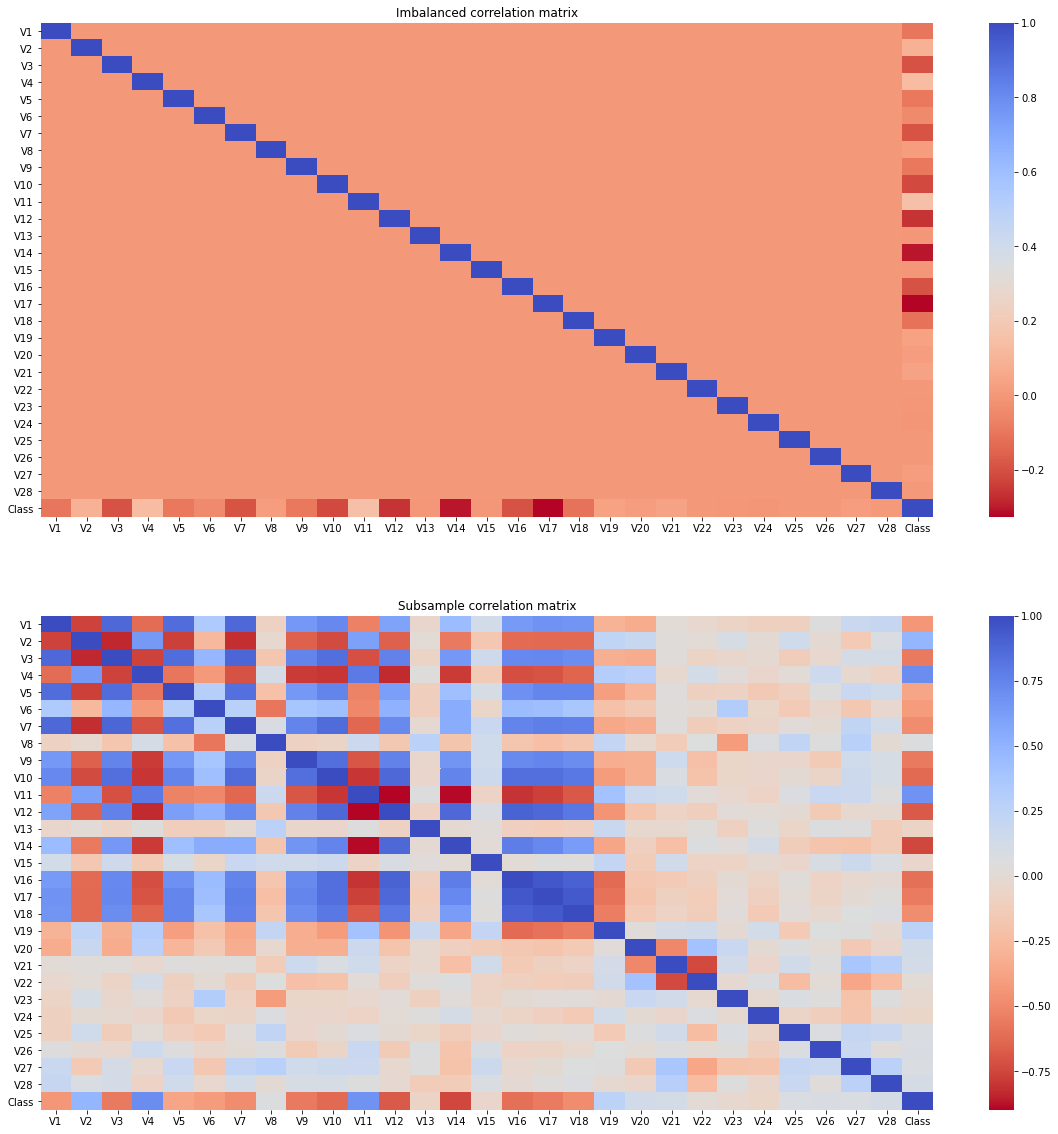

In [52]:
f,(ax1,ax2)=plt.subplots(2,1,figsize=(20,20))

sns.heatmap(credit_card_corr,cmap='coolwarm_r',ax=ax1)
sns.heatmap(new_df_corr,cmap='coolwarm_r',ax=ax2)

ax1.set_title('Imbalanced correlation matrix')
ax2.set_title('Subsample correlation matrix')

We can see that With respect to Class,Variables V2,V4,V11 and V19 are Possitively correlated to the Type of Transaction whereas,
V9,V10,V12,V14,V16-V18 are Negeatively Correlated. We Can Plot Box Plot to Find correlation Between These Variables With respect to Class.

Text(0.5, 1.0, 'V10 vs class Negative crorrelation')

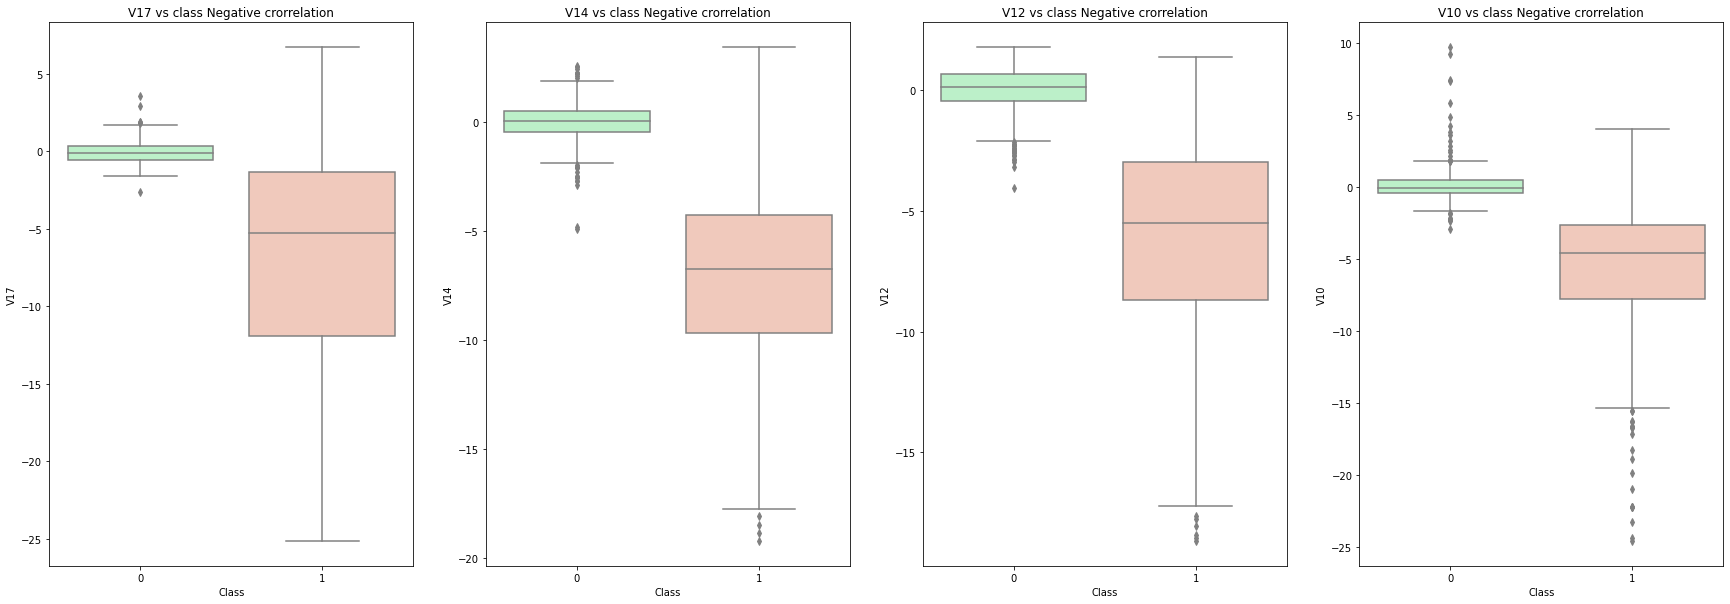

In [53]:
colors = ['#B3F9C5', '#f9c5b3']
f,axes=plt.subplots(ncols=4,figsize=(30,10))

sns.boxplot(x='Class',y='V17',data=new_df,palette=colors,ax=axes[0])
axes[0].set_title('V17 vs class Negative crorrelation')

sns.boxplot(x='Class',y='V14',data=new_df,palette=colors,ax=axes[1])
axes[1].set_title('V14 vs class Negative crorrelation')

sns.boxplot(x='Class',y='V12',data=new_df,palette=colors,ax=axes[2])
axes[2].set_title('V12 vs class Negative crorrelation')

sns.boxplot(x='Class',y='V10',data=new_df,palette=colors,ax=axes[3])
axes[3].set_title('V10 vs class Negative crorrelation')

Text(0.5, 1.0, 'V19 vs class Negative crorrelation')

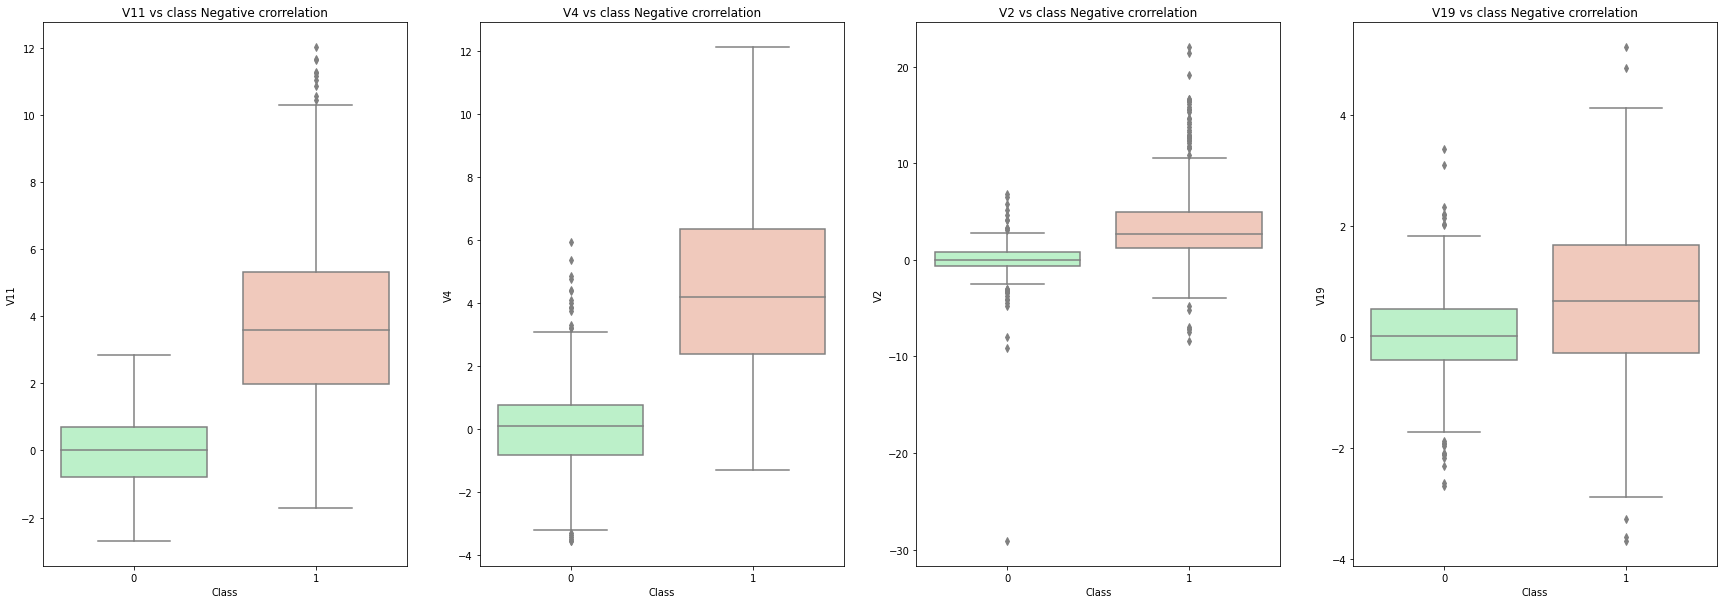

In [54]:
f,axes=plt.subplots(ncols=4,figsize=(30,10))

sns.boxplot(x='Class',y='V11',data=new_df,palette=colors,ax=axes[0])
axes[0].set_title('V11 vs class Negative crorrelation')

sns.boxplot(x='Class',y='V4',data=new_df,palette=colors,ax=axes[1])
axes[1].set_title('V4 vs class Negative crorrelation')

sns.boxplot(x='Class',y='V2',data=new_df,palette=colors,ax=axes[2])
axes[2].set_title('V2 vs class Negative crorrelation')

sns.boxplot(x='Class',y='V19',data=new_df,palette=colors,ax=axes[3])
axes[3].set_title('V19 vs class Negative crorrelation')

Text(0.5, 1.0, 'V10 Distribution\nfraud distribution')

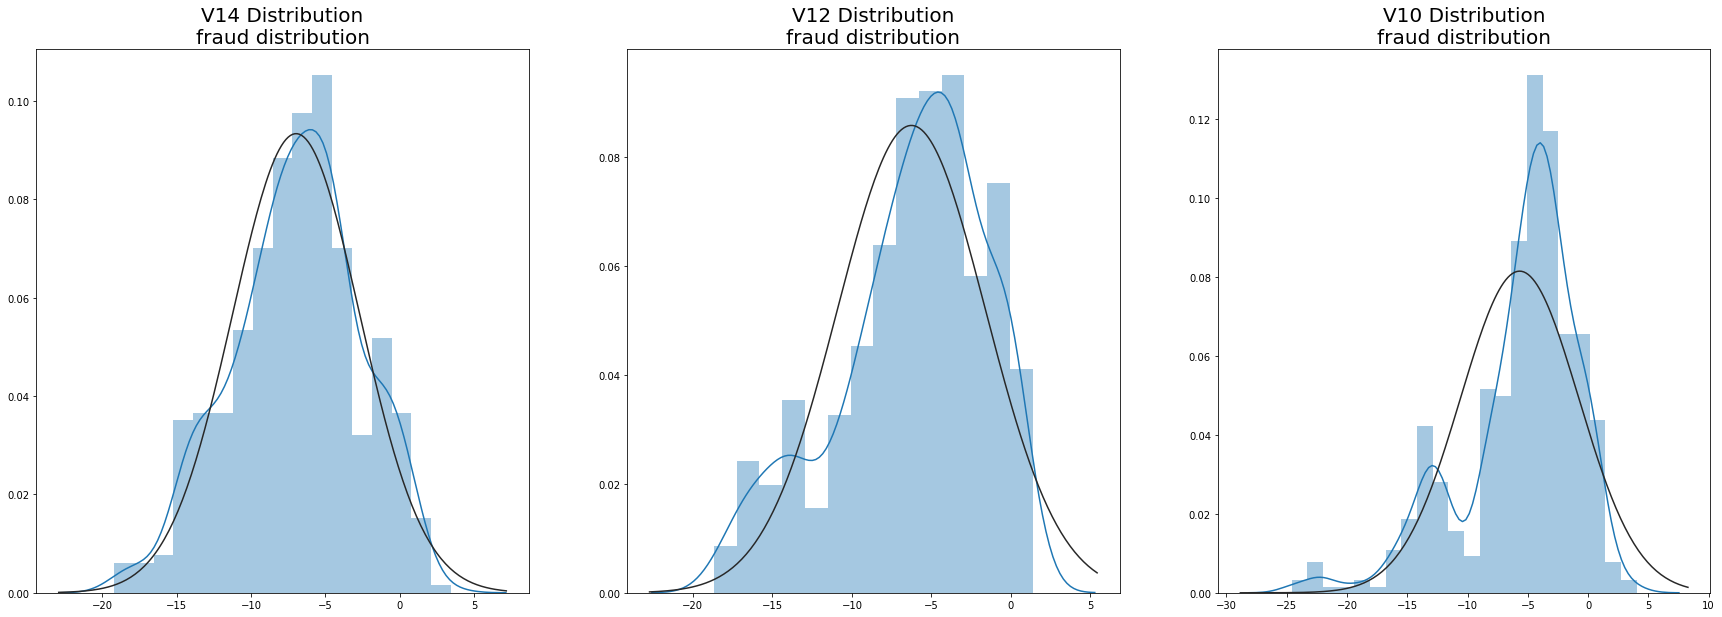

In [55]:
from scipy.stats import norm
f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(30,10))

v14_fraud_dist=new_df['V14'].loc[new_df['Class']==1].values
sns.distplot(v14_fraud_dist,ax=ax1,fit=norm)
ax1.set_title('V14 Distribution\nfraud distribution',fontsize=20)

v12_fraud_dist=new_df['V12'].loc[new_df['Class']==1].values
sns.distplot(v12_fraud_dist,ax=ax2,fit=norm)
ax2.set_title('V12 Distribution\nfraud distribution',fontsize=20)

v10_fraud_dist=new_df['V10'].loc[new_df['Class']==1].values
sns.distplot(v10_fraud_dist,ax=ax3,fit=norm)
ax3.set_title('V10 Distribution\nfraud distribution',fontsize=20)

In [56]:


v14_fraud=new_df['V14'].loc[new_df['Class']==1].values
q25,q75=np.percentile(v14_fraud,25),np.percentile(v14_fraud,75)
v14_iqr=q75-q25

v14_cutoff=v14_iqr*1.5
v14_lower,v14_upper=q25-v14_cutoff,q75+v14_cutoff

outliers=[x for x in v14_fraud if x<v14_lower or x>v14_upper]

new_df=new_df.drop(new_df[(new_df['V14']>v14_upper)|(new_df['V14']<v14_lower)].index)
#V12 outliers

v12_fraud=new_df['V12'].loc[new_df['Class']==1].values
q25,q75=np.percentile(v12_fraud,25),np.percentile(v12_fraud,75)
v12_iqr=q75-q25

v12_cutoff=v12_iqr*1.5
v12_lower,v12_upper=q25-v12_cutoff,q75+v12_cutoff

outliers=[x for x in v12_fraud if x<v12_lower or x>v12_upper]

new_df=new_df.drop(new_df[(new_df['V12']>v12_upper)|(new_df['V12']<v12_lower)].index)

#v10 outliers

v10_fraud=new_df['V10'].loc[new_df['Class']==1].values
q25,q75=np.percentile(v10_fraud,25),np.percentile(v10_fraud,75)
v10_iqr=q75-q25


v10_cutoff=v10_iqr*1.5
v10_lower,v10_upper=q25-v10_cutoff,q75+v10_cutoff

outliers=[x for x in v10_fraud if x<v10_lower or x>v10_upper]


new_df=new_df.drop(new_df[(new_df['V10']>v10_upper)|(new_df['V10']<v10_lower)].index)


Text(0.5, 1.0, 'V10 vs class Negative crorrelation')

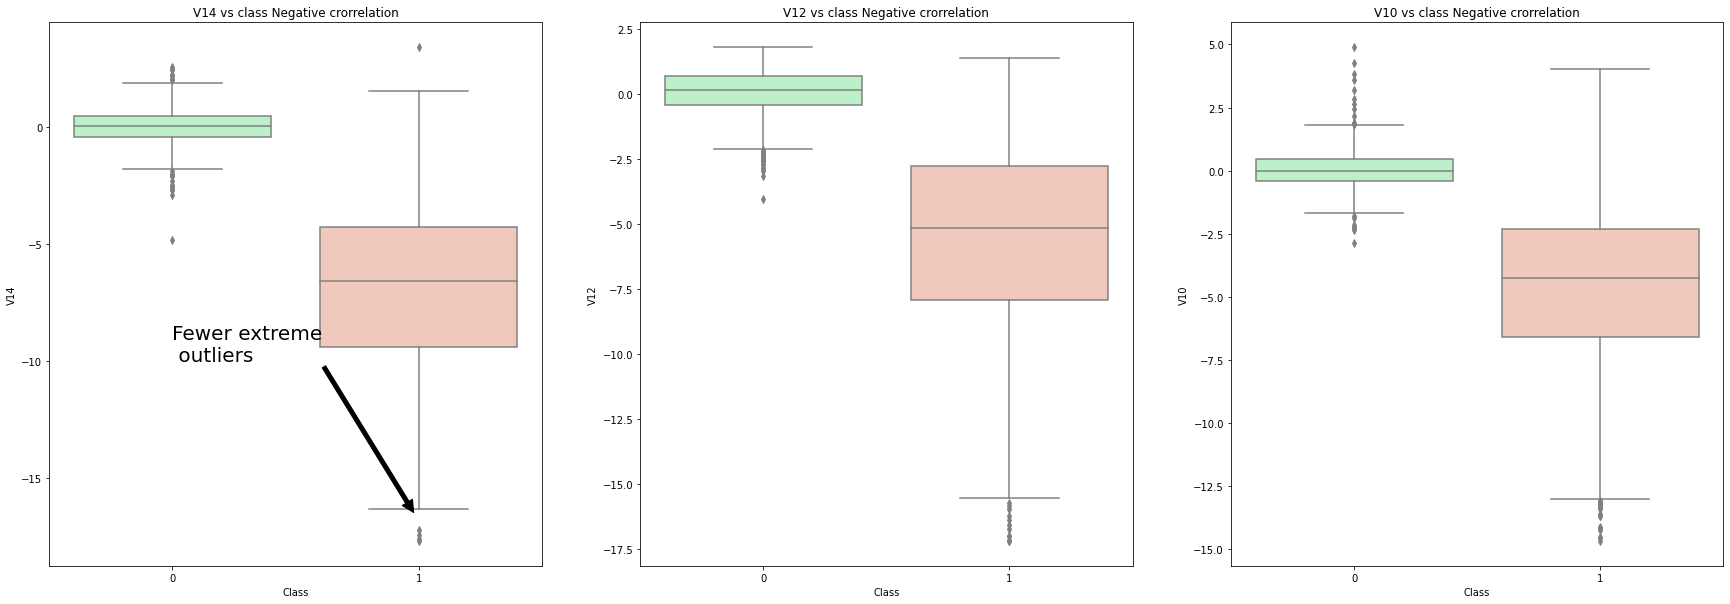

In [57]:
f,axes=plt.subplots(ncols=3,figsize=(30,10))

sns.boxplot(x='Class',y='V14',data=new_df,palette=colors,ax=axes[0])
axes[0].set_title('V14 vs class Negative crorrelation')
axes[0].annotate('Fewer extreme\n outliers',xy=(0.98,-16.5),xytext=(0,-10),arrowprops=dict(facecolor='black'),fontsize=20)

sns.boxplot(x='Class',y='V12',data=new_df,palette=colors,ax=axes[1])
axes[1].set_title('V12 vs class Negative crorrelation')

sns.boxplot(x='Class',y='V10',data=new_df,palette=colors,ax=axes[2])
axes[2].set_title('V10 vs class Negative crorrelation')

#### Box-Plot after removing Outliers

We can make use of dimensionality reduction Algorithms to Group The data points in a 2-D plane, We'll use T-SNE,PCA andTruncatedSVD. And See which Performs Better and also Check which Algorithm is faster.

In [58]:
X=new_df.drop('Class',axis=1)
y=new_df['Class']

#T-SNE implementation

t0=time.time()
X_reduced_tsne=TSNE(n_components=2,random_state=42).fit_transform(X.values)
t1=time.time()
print('T-SNE took {:.2} s'.format(t1-t0))

#PCA implementation
t0=time.time()
X_reduced_PCA=PCA(n_components=2,random_state=42).fit_transform(X.values)
t1=time.time()
print('PCA took {:.2} s'.format(t1-t0))


#TruncatedSVD
t0=time.time()
X_reduced_svd=TruncatedSVD(n_components=2,algorithm='randomized').fit_transform(X.values)
t1=time.time()
print('svd took {:.2} s'.format(t1-t0))

T-SNE took 5.5 s
PCA took 0.03 s
svd took 0.0034 s


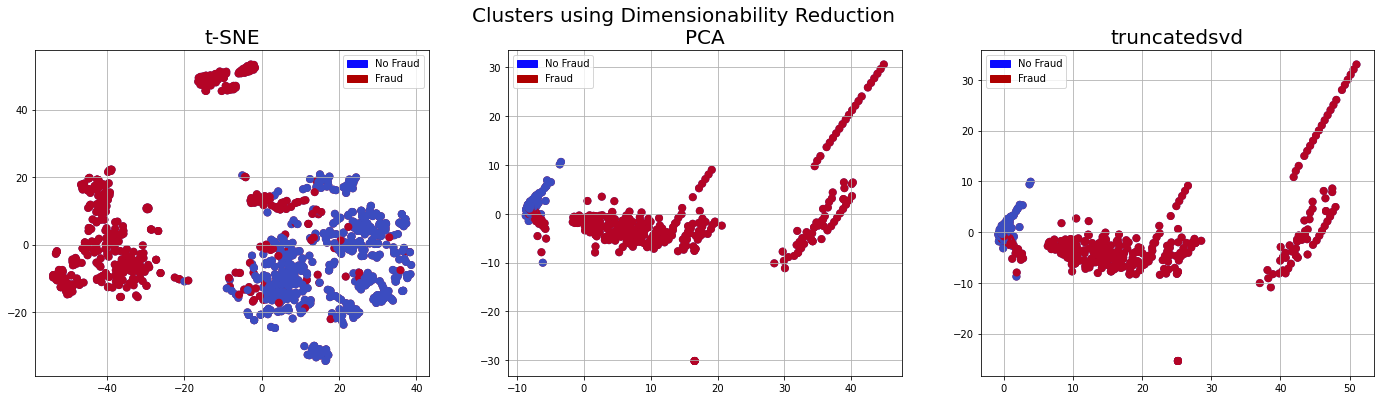

In [59]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(24,6))
f.suptitle('Clusters using Dimensionability Reduction',fontsize=20)


blue_patch=mpatches.Patch(color='#0A0AFF',label='No Fraud')
red_patch=mpatches.Patch(color='#AF0000',label='Fraud')

#t-SNE scatter plot

ax1.scatter(X_reduced_tsne[:,0],X_reduced_tsne[:,1],c=(y==0),cmap='coolwarm',label='No Fraud',linewidths=2)
ax1.scatter(X_reduced_tsne[:,0],X_reduced_tsne[:,1],c=(y==1),cmap='coolwarm',label='Fraud',linewidths=2)
ax1.set_title('t-SNE',fontsize=20)
ax1.grid(True)
ax1.legend(handles=[blue_patch,red_patch])

#PCA
ax2.scatter(X_reduced_PCA[:,0],X_reduced_PCA[:,1],c=(y==0),cmap='coolwarm',label='No Fraud',linewidths=2)
ax2.scatter(X_reduced_PCA[:,0],X_reduced_PCA[:,1],c=(y==1),cmap='coolwarm',label='Fraud',linewidths=2)
ax2.set_title('PCA',fontsize=20)
ax2.grid(True)
ax2.legend(handles=[blue_patch,red_patch])


#truncatedsvd
ax3.scatter(X_reduced_svd[:,0],X_reduced_svd[:,1],c=(y==0),cmap='coolwarm',label='No Fraud',linewidths=2)
ax3.scatter(X_reduced_svd[:,0],X_reduced_svd[:,1],c=(y==1),cmap='coolwarm',label='Fraud',linewidths=2)
ax3.set_title('truncatedsvd',fontsize=20)
ax3.grid(True)
ax3.legend(handles=[blue_patch,red_patch])

In [60]:
X=new_df.drop('Class',axis=1)
y=new_df['Class']

In [61]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

Train Model with different Machine Learning ALgorithms

In [63]:
classifiers={'LogisticRegression':LogisticRegression(),'KNearest':KNeighborsClassifier(),
            'Support Vector Classifier':SVC(),'DecisionTreeClassifier':DecisionTreeClassifier()}

In [64]:
from sklearn.model_selection import cross_val_score

for key,classifier in classifiers.items():
    classifier.fit(X_train,y_train) 
    training_score=cross_val_score(classifier,X_train,y_train,cv=5)
    print('Classifiers:',classifier.__class__.__name__,'has a training score of',round(training_score.mean(),2)*100,
         '% accuracy score')
    

Classifiers: LogisticRegression has a training score of 94.0 % accuracy score
Classifiers: KNeighborsClassifier has a training score of 93.0 % accuracy score
Classifiers: SVC has a training score of 93.0 % accuracy score
Classifiers: DecisionTreeClassifier has a training score of 89.0 % accuracy score


We can make use of GridSearchCV to check the best paramater fit for Algorithms

In [65]:
from sklearn.model_selection import GridSearchCV

log_reg_params={'penalty':['l1','l2'],'C':[0.001,0.01,0.1,10,100,1000]}

grid_log_reg=GridSearchCV(LogisticRegression(),log_reg_params)
grid_log_reg.fit(X_train,y_train)

#we get the logistic regression with the best paramater

log_reg=grid_log_reg.best_estimator_
print('Log_reg Best parameters: {}'.format(log_reg))

#Knearest

knears_params={'n_neighbors':list(range(2,5,1)),'algorithm':['auto','ball_tree','kd_tree','brute']}
grid_knears=GridSearchCV(KNeighborsClassifier(),knears_params)
grid_knears.fit(X_train,y_train)
knears_neighbors=grid_knears.best_estimator_
print('Knearest Best parameters: {}'.format(knears_neighbors))

#support vector classifier

svc_paramns={'C':[0.5,0.7,0.9,1],'kernel':['rbf','poly','sigmoid','linear']}
grid_svc=GridSearchCV(SVC(),svc_paramns)
grid_svc.fit(X_train,y_train)
svc=grid_svc.best_estimator_
print('svc Best parameters: {}'.format(svc))

#Decision tree clasifier

tree_params={'criterion':['gini','entropy'],'max_depth':list(range(2,4,1)),'min_samples_leaf':list(range(5,7,1))}
grid_tree=GridSearchCV(DecisionTreeClassifier(),tree_params)
grid_tree.fit(X_train,y_train)
tree_clf=grid_tree.best_estimator_
print('Decision Tree Best parameters: {}'.format(tree_clf))



Log_reg Best parameters: LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Knearest Best parameters: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')
svc Best parameters: SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Decision Tree Best parameters: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, m

In [66]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

log_reg_predict=cross_val_predict(log_reg,X_train,y_train,cv=5,method='decision_function')
knears_pred=cross_val_predict(knears_neighbors,X_train,y_train,cv=5)
svc_pred=cross_val_predict(svc,X_train,y_train,cv=5,method='decision_function')
tree_pred=cross_val_predict(tree_clf,X_train,y_train,cv=5)

In [67]:
from sklearn.metrics import roc_auc_score


print('logistic regression:',roc_auc_score(y_train,log_reg_predict))
print('knearest :',roc_auc_score(y_train,knears_pred))
print('support vector classifier:',roc_auc_score(y_train,svc_pred))
print('Decision tree classifier:',roc_auc_score(y_train,tree_pred))

logistic regression: 0.9736757105943152
knearest : 0.9298147680035951
support vector classifier: 0.9764984271430176
Decision tree classifier: 0.9214379002359285


Function for Plotting ROC Curve for All Algorithms defined Earlier

In [68]:
log_fpr,log_tpr,log_threshold=roc_curve(y_train,log_reg_predict)
knear_fpr,knear_tpr,knear_threshold=roc_curve(y_train,knears_pred)
svc_fpr,svc_tpr,svc_threshold=roc_curve(y_train,svc_pred)
tree_fpr,tree_tpr,tree_threshold=roc_curve(y_train,tree_pred)

def graph_roc_curve_multiple(log_fpr,log_tpr,knear_fpr,knear_tpr,svc_fpr,svc_tpr,tree_fpr,tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('Roc Curve \n Top 4 classifier',fontsize=18)
    plt.plot(log_fpr,log_tpr,label='Logistic regression classifier score:{:.4f}'.
             format(roc_auc_score(y_train,log_reg_predict)))
    plt.plot(knear_fpr,knear_tpr,label='Knear Neighbor classifier score:{:.4f}'.
             format(roc_auc_score(y_train,knears_pred)))
    plt.plot(svc_fpr,svc_tpr,label='Logistic regression classifier score:{:.4f}'.
             format(roc_auc_score(y_train,svc_pred)))
    plt.plot(tree_fpr,tree_tpr,label='Logistic regression classifier score:{:.4f}'.
             format(roc_auc_score(y_train,tree_pred)))
    
    plt.plot([0,1],[0,1],'k--')
    plt.axis([-0.01,1,0,1])
    plt.xlabel('False positive rate',fontsize=16)
    plt.ylabel('True positive rate',fontsize=16)
    plt.legend()

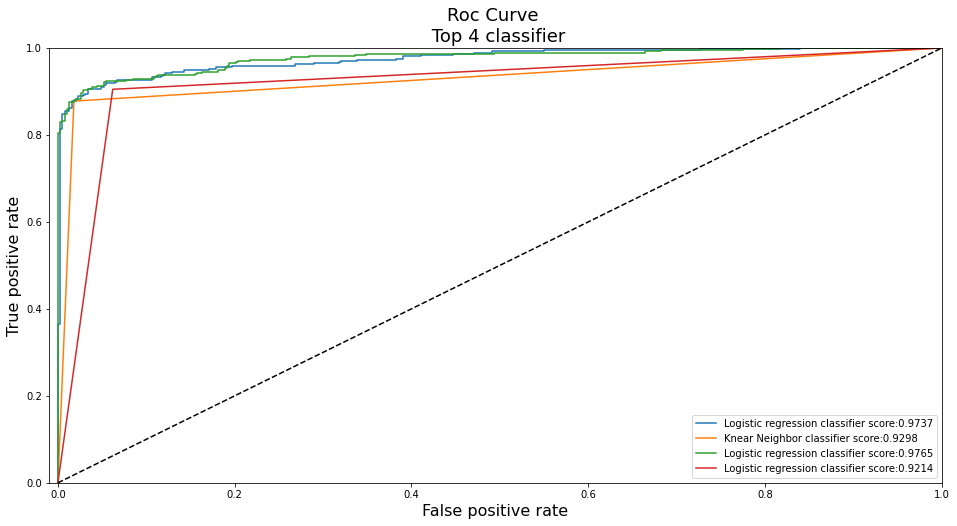

In [69]:
graph_roc_curve_multiple(log_fpr,log_tpr,knear_fpr,knear_tpr,svc_fpr,svc_tpr,tree_fpr,tree_tpr)
plt.show()

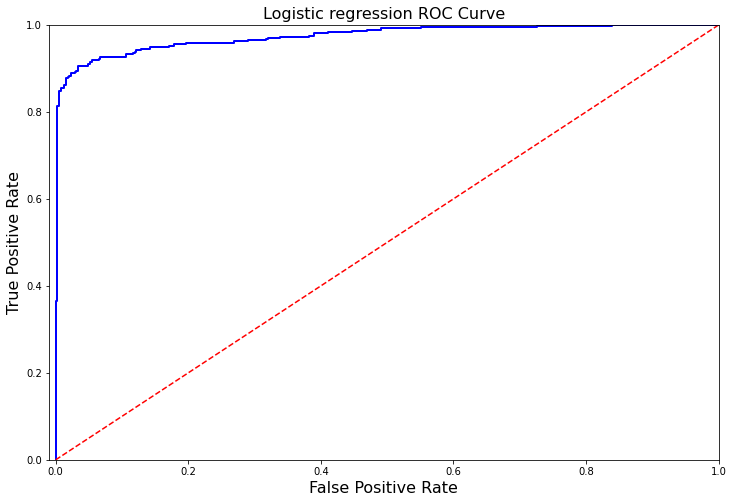

In [70]:
def logistic_roc_curve(log_fpr,log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic regression ROC Curve',fontsize=16)
    plt.plot(log_fpr,log_tpr,'b-',linewidth=2)
    plt.plot([0,1],'r--')
    plt.xlabel('False Positive Rate',fontsize=16)
    plt.ylabel('True Positive Rate',fontsize=16)
    plt.axis([-0.01,1,0,1])
    
logistic_roc_curve(log_fpr,log_tpr)

In [71]:
from sklearn.metrics import precision_recall_curve

precision,recall,threshold=precision_recall_curve(y_train,log_reg_predict)

In [75]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

print('Length of X(train):{}| Length of y(train):{}'.format(len(original_Xtrain),len(original_ytrain)))
print('Length of X(test):{}| Length of y(test):{}'.format(len(original_Xtest),len(original_ytest)))

#list to append and to find the average

accuracy_lst=[]
precision_lst=[]
recall_lst=[]
f1_lst=[]
auc_lst=[]

#Classification with optimial paramaters
log_reg_sm=LogisticRegression()
rand_log_reg=RandomizedSearchCV(LogisticRegression(),log_reg_params,n_iter=4)

#implementing SMOTE Curve
#Cross validating the right way

log_reg_params={'penalty':['l1','l2'],'C':[0.001,0.01,0.1,1,10,100,1000]}
#log_reg_params1={'penalty':'l2','C':[0.001,0.01,0.1,1,10,100,1000]}

for train,test in sss.split(original_Xtrain,original_ytrain):
    pipeline=imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'),rand_log_reg)#SMOTE happens befor cross validatin
    model=pipeline.fit(original_Xtrain[train],original_ytrain[train])
    best_est=rand_log_reg.best_estimator_
    prediction=best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test],original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test],prediction))
    recall_lst.append(recall_score(original_ytrain[test],prediction))
    f1_lst.append(f1_score(original_ytrain[test],prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test],prediction))

print('---'*41)
print('Accuracy:{}'.format(np.mean(accuracy_lst)))
print('Precision:{}'.format(np.mean(precision_lst)))
print('Recall:{}'.format(np.mean(recall_lst)))
print('f1:{}'.format(np.mean(f1_lst)))
print('auc:{}'.format(np.mean(auc_lst)))


Length of X(train):256326| Length of y(train):256326
Length of X(test):28481| Length of y(test):28481
---------------------------------------------------------------------------------------------------------------------------
Accuracy:0.9737603870011313
Precision:0.0547230876369205
Recall:0.8772727272727272
f1:0.10301041798783916
auc:0.9255995118641177


In [76]:
labels=['No Fraud','Fraud']
smote_prediction=best_est.predict(original_Xtest)
print(classification_report(original_ytest,smote_prediction,target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     28432
       Fraud       0.06      0.92      0.12        49

    accuracy                           0.98     28481
   macro avg       0.53      0.95      0.55     28481
weighted avg       1.00      0.98      0.99     28481



In [77]:
y_score=best_est.decision_function(original_Xtest)

In [91]:
from sklearn.metrics import  average_precision_score
average_precision=average_precision_score(original_ytest,y_score)
print(original_ytest.shape)

(28481,)


In [97]:
sm=SMOTE(ratio='minority',random_state=42)

Xsm_train,ysm_train=sm.fit_sample(original_Xtrain,original_ytrain)
Xsm_train.shape

(511766, 28)

In [94]:
log_reg_sm=grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train,ysm_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

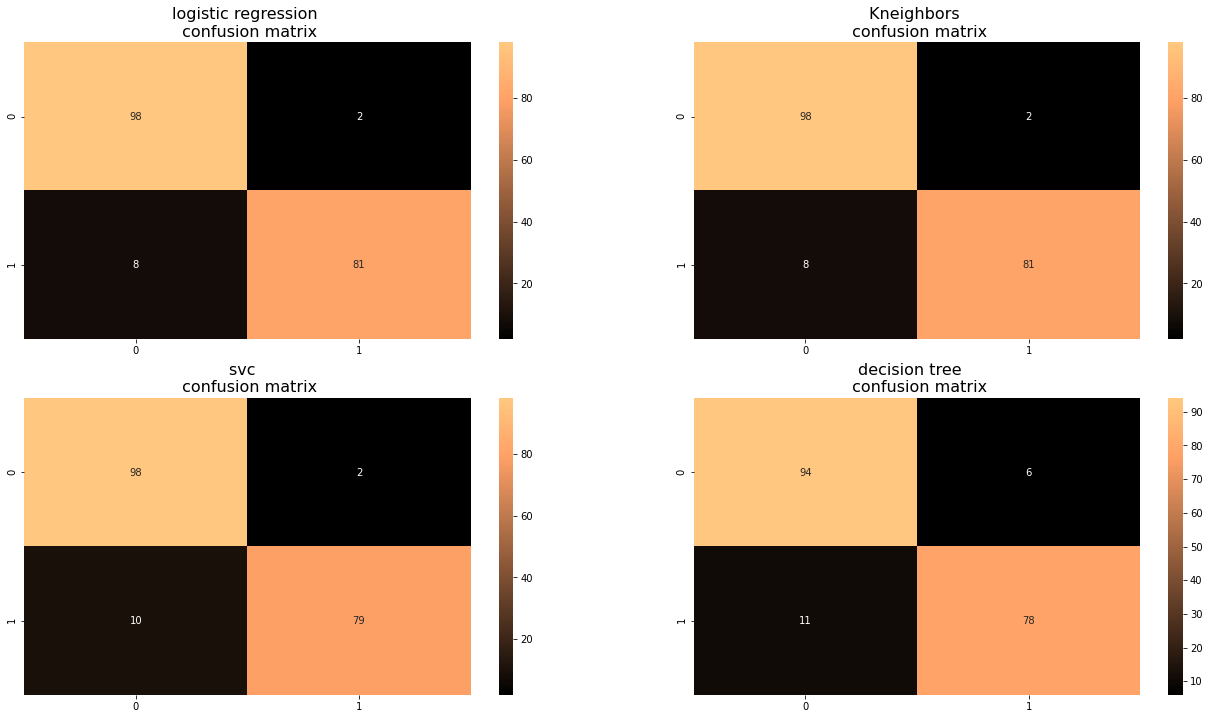

In [98]:
from sklearn.metrics import confusion_matrix
#logistic regression fitted with SMOTE technique
#test the model with Fewer samples and check the accuracy score
y_pred_log_reg=log_reg_sm.predict(X_test)

#other model fitted with undersampling
y_pred_knear=knears_neighbors.predict(X_test)
y_pred_svc=svc.predict(X_test)
y_pred_tree=tree_clf.predict(X_test)


log_reg_cf=confusion_matrix(y_test,y_pred_log_reg)
kneighbors_cf=confusion_matrix(y_test,y_pred_knear)
svc_cf=confusion_matrix(y_test,y_pred_svc)
tree_cf=confusion_matrix(y_test,y_pred_tree)

fig,ax=plt.subplots(2,2,figsize=(22,12))

sns.heatmap(log_reg_cf,ax=ax[0][0],annot=True,cmap=plt.cm.copper)
ax[0,0].set_title('logistic regression \n confusion matrix',fontsize=16)

sns.heatmap(kneighbors_cf,ax=ax[0][1],annot=True,cmap=plt.cm.copper)
ax[0,1].set_title('Kneighbors \n confusion matrix',fontsize=16)

sns.heatmap(svc_cf,ax=ax[1][0],annot=True,cmap=plt.cm.copper)
ax[1,0].set_title('svc  \n confusion matrix',fontsize=16)

sns.heatmap(tree_cf,ax=ax[1][1],annot=True,cmap=plt.cm.copper)
ax[1,1].set_title('decision tree   \n confusion matrix',fontsize=16)

plt.show()


In [99]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_test,y_pred_log_reg))
print('---'*41)

print('K nearest neighbor:')
print(classification_report(y_test,y_pred_knear))
print('---'*41)

print('svc:')
print(classification_report(y_test,y_pred_svc))
print('---'*41)

print('Decision tree:')
print(classification_report(y_test,y_pred_tree))
print('---'*41)

Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       100
           1       0.98      0.91      0.94        89

    accuracy                           0.95       189
   macro avg       0.95      0.95      0.95       189
weighted avg       0.95      0.95      0.95       189

---------------------------------------------------------------------------------------------------------------------------
K nearest neighbor:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       100
           1       0.98      0.91      0.94        89

    accuracy                           0.95       189
   macro avg       0.95      0.95      0.95       189
weighted avg       0.95      0.95      0.95       189

---------------------------------------------------------------------------------------------------------------------------
svc:
              precision    recall  f1-score   suppor